<a href="https://colab.research.google.com/github/aadityadamle/Classifying-Research-Articles/blob/main/Classifying_Research_Articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

In [ ]:
!wget https://raw.githubusercontent.com/aadityadamle/Classifying-Research-Articles/main/train.csv

--2021-02-08 10:37:18--  https://raw.githubusercontent.com/aadityadamle/Classifying-Research-Articles/main/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23151008 (22M) [text/plain]
Saving to: ‘train.csv.3’

train.csv.3         100%[===================>]  22.08M  --.-KB/s    in 0.1s    

2021-02-08 10:37:18 (206 MB/s) - ‘train.csv.3’ saved [23151008/23151008]



In [ ]:
data = pd.read_csv("/content/train.csv")
print(data.head)

<bound method NDFrame.head of           ID  ... Quantitative Finance
0          1  ...                    0
1          2  ...                    0
2          3  ...                    0
3          4  ...                    0
4          5  ...                    0
...      ...  ...                  ...
20967  20968  ...                    0
20968  20969  ...                    0
20969  20970  ...                    0
20970  20971  ...                    0
20971  20972  ...                    0

[20972 rows x 9 columns]>


In [ ]:
print(data.shape)
print(data.columns)

(20972, 9)
Index(['ID', 'TITLE', 'ABSTRACT', 'Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance'],
      dtype='object')


In [ ]:
data = data[['TITLE', 'ABSTRACT', 'Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance']]
print(data.columns)
print(data.head)

Index(['TITLE', 'ABSTRACT', 'Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance'],
      dtype='object')
<bound method NDFrame.head of                                                    TITLE  ... Quantitative Finance
0            Reconstructing Subject-Specific Effect Maps  ...                    0
1                     Rotation Invariance Neural Network  ...                    0
2      Spherical polyharmonics and Poisson kernels fo...  ...                    0
3      A finite element approximation for the stochas...  ...                    0
4      Comparative study of Discrete Wavelet Transfor...  ...                    0
...                                                  ...  ...                  ...
20967  Contemporary machine learning: a guide for pra...  ...                    0
20968  Uniform diamond coatings on WC-Co hard alloy c...  ...                    0
20969  Analysing Soccer Games with Clustering and Con... 

In [ ]:
topics = data.drop(["TITLE", "ABSTRACT"],axis= 1)
t_name = topics.columns.tolist()
t_counts = []
for i in t_name:
  t_counts.append((i,topics[i].sum()))
t_stats = pd.DataFrame(t_counts,columns=["topic", "number_of_publications"])
print(t_stats)


                  topic  number_of_publications
0      Computer Science                    8594
1               Physics                    6013
2           Mathematics                    5618
3            Statistics                    5206
4  Quantitative Biology                     587
5  Quantitative Finance                     249


Text(0.5, 0, 'Topics')

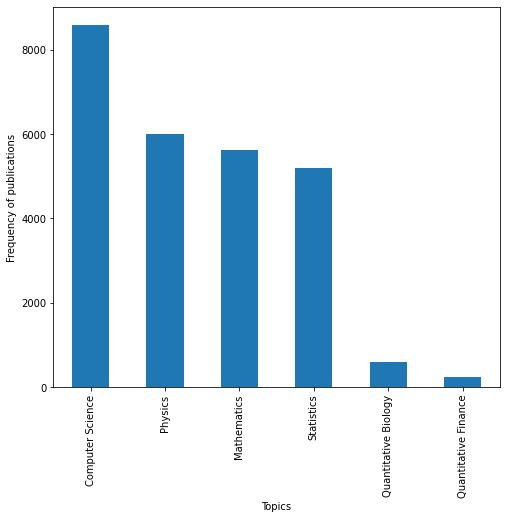

In [ ]:
t_stats.plot(x="topic", y = "number_of_publications", kind="bar",legend= False, figsize =(8,7))
plt.ylabel("Frequency of publications")
plt.xlabel("Topics")

In [ ]:
#Number of publications in more than 1 topic 
num_multilabel = data.sum(axis=1)
print(num_multilabel.tolist())
count = 0
for i in num_multilabel.to_list():
  if i > 1:
    count += 1
print("Number of multilabel comments: ",count)


[1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 

In [ ]:
# Extract abstracts from dataframe as series
abstracts = data["ABSTRACT"]
print(abstracts[:10])

0      Predictive models allow subject-specific inf...
1      Rotation invariance and translation invarian...
2      We introduce and develop the notion of spher...
3      The stochastic Landau--Lifshitz--Gilbert (LL...
4      Fourier-transform infra-red (FTIR) spectra o...
5      Let $\Omega \subset \mathbb{R}^n$ be a bound...
6      We observed the newly discovered hyperbolic ...
7      The ability of metallic nanoparticles to sup...
8      We model large-scale ($\approx$2000km) impac...
9      Time varying susceptibility of host at indiv...
Name: ABSTRACT, dtype: object


In [ ]:
#Remove punctuation
abstracts = abstracts.str.replace(r'[^A-Za-z]', ' ')
print(abstracts[:10])

0      Predictive models allow subject specific inf...
1      Rotation invariance and translation invarian...
2      We introduce and develop the notion of spher...
3      The stochastic Landau  Lifshitz  Gilbert  LL...
4      Fourier transform infra red  FTIR  spectra o...
5      Let   Omega  subset  mathbb R  n  be a bound...
6      We observed the newly discovered hyperbolic ...
7      The ability of metallic nanoparticles to sup...
8      We model large scale    approx     km  impac...
9      Time varying susceptibility of host at indiv...
Name: ABSTRACT, dtype: object


In [ ]:
# Set to lowercase
abstracts = abstracts.str.lower()
print(abstracts[:10])

0      predictive models allow subject specific inf...
1      rotation invariance and translation invarian...
2      we introduce and develop the notion of spher...
3      the stochastic landau  lifshitz  gilbert  ll...
4      fourier transform infra red  ftir  spectra o...
5      let   omega  subset  mathbb r  n  be a bound...
6      we observed the newly discovered hyperbolic ...
7      the ability of metallic nanoparticles to sup...
8      we model large scale    approx     km  impac...
9      time varying susceptibility of host at indiv...
Name: ABSTRACT, dtype: object


In [ ]:
#dowload stopwords
nltk.download("stopwords")
#Setup and remove English stopwords from messages
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Removing the words in stop_words from every tweet
abstracts = abstracts.apply(lambda x : " ".
                            join(word for word in x.split() 
                            if word not in stop_words))
print(abstracts[:10])

0    predictive models allow subject specific infer...
1    rotation invariance translation invariance gre...
2    introduce develop notion spherical polyharmoni...
3    stochastic landau lifshitz gilbert llg equatio...
4    fourier transform infra red ftir spectra sampl...
5    let omega subset mathbb r n bounded domain sat...
6    observed newly discovered hyperbolic minor pla...
7    ability metallic nanoparticles supply heat liq...
8    model large scale approx km impacts mars like ...
9    time varying susceptibility host individual le...
Name: ABSTRACT, dtype: object


In [ ]:
#Stemming using PorterStemmer 
ps = nltk.PorterStemmer()
abstracts = abstracts.apply(lambda x: ' '.join(ps.stem(word) 
                            for word in x.split()))
print(abstracts[:10])

0    predict model allow subject specif infer analy...
1    rotat invari translat invari great valu imag r...
2    introduc develop notion spheric polyharmon nat...
3    stochast landau lifshitz gilbert llg equat cou...
4    fourier transform infra red ftir spectra sampl...
5    let omega subset mathbb r n bound domain satis...
6    observ newli discov hyperbol minor planet oumu...
7    abil metal nanoparticl suppli heat liquid envi...
8    model larg scale approx km impact mar like pla...
9    time vari suscept host individu level due wane...
Name: ABSTRACT, dtype: object


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [ ]:
X = vectorizer.fit_transform(abstracts)

In [ ]:
print(vectorizer.get_feature_names())

['aa', 'aaa', 'aaai', 'aabb', 'aact', 'aad', 'aae', 'aah', 'aak', 'aakn', 'aal', 'aalen', 'aanet', 'aaomega', 'aapl', 'aapm', 'aaria', 'aarn', 'aaronson', 'aasp', 'aavso', 'ab', 'aba', 'abaci', 'abadi', 'abalon', 'abandon', 'abaqu', 'abat', 'abb', 'abbi', 'abbilden', 'abbrev', 'abbrevi', 'abc', 'abcd', 'abctoolbox', 'abda', 'abdmg', 'abdomen', 'abdomin', 'abduct', 'abe', 'abel', 'abelian', 'abelion', 'abella', 'abernethi', 'aberr', 'aberrantli', 'abeyesingh', 'abhm', 'abhyankar', 'abid', 'abidi', 'abil', 'abinit', 'abinitio', 'abio', 'abiot', 'abitrari', 'abjm', 'abl', 'ablat', 'ableiten', 'ablowitz', 'abm', 'abn', 'abneg', 'abner', 'abnorm', 'abo', 'aboard', 'abolish', 'aboria', 'abort', 'abounadi', 'abound', 'abouzaid', 'abovement', 'abox', 'abp', 'abpackag', 'abraham', 'abrahamsen', 'abramovich', 'abras', 'abresch', 'abri', 'abridg', 'abrikosov', 'abroad', 'abrupt', 'abruptli', 'abscissa', 'absenc', 'absent', 'absf', 'absolut', 'absolutli', 'absorb', 'absorpt', 'abstain', 'abstent',

In [ ]:
print(len(vectorizer.get_feature_names()))

34201


In [ ]:
print(X.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In the previous project the array of outcomes had only single value that is 1 or 0 but here the array of outcomes is different from before. As there are 6 categories and the one article can be classified in many categories the outcome of every paper will also contain 6 values. So the final array of outcomes will contain a vector of 6 values each for all the papers. 

In [ ]:
y = np.array(topics)
print(y)

[[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 1 0 0 0]
 ...
 [1 0 0 0 0 0]
 [0 0 1 1 0 0]
 [0 0 1 1 0 0]]


You can easily see that its multilabel outcomes from the last two vectors

In [ ]:
pip install imbalanced-learn

In [ ]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy="not majority")

In [ ]:
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X_over, y_over, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()

In [ ]:
classifier.fit(Train_X,Train_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
prediction = classifier.predict(Test_X)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("KNeighbors Accuracy score is ",accuracy_score(prediction, Test_Y)*100)

KNeighbors Accuracy score is  83.15879295632612
